# Predicting Whether given Show is Movie or Series

# 1.Reviewing Data, 2.Data Preprocessing, 3.Exploratory Data Analysis (EDA)

In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading csv file
net = pd.read_csv(r"D:\Assignment_ML\netflix1.csv")

In [4]:
# The first 5 observation 
net.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
# The last 5 observation 
net.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [6]:
# The size of the data set 
net.shape

(8790, 10)

In [7]:
# Feature information
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
#describing data set
net.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
# getting type of columns
column_types = net.dtypes
print(column_types)

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


In [10]:
# categorical Variables
categorical_variables = [
    col for col in net.columns 
    if net[col].dtype == 'object']
print(categorical_variables)

['show_id', 'type', 'title', 'director', 'country', 'date_added', 'rating', 'duration', 'listed_in']


In [11]:
# Numeric Variables
numeric_variables = [
    col for col in net.columns 
    if net[col].dtype != "object"]
numeric_variables

['release_year']

In [12]:
net.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [13]:
net = net.drop(['date_added'], axis=1)

In [14]:
# The first 5 observation 
net.head(5)

,show_id,type,title,director,country,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [15]:
net = net.drop(['show_id'], axis=1)

In [16]:
# checking duplicate values in DataFrame
duplicates = net.duplicated()
print(duplicates.sum())     # Number of duplicated rows
print(net[duplicates])    # Duplicated rows

3
         type   title            director   country  release_year rating  \
537   TV Show   9-Feb           Not Given  Pakistan          2018  TV-14   
4260    Movie  22-Jul     Paul Greengrass    Norway          2018      R   
4261    Movie  15-Aug  Swapnaneel Jayakar     India          2019  TV-14   

      duration                             listed_in  
537   1 Season     International TV Shows, TV Dramas  
4260   144 min                     Dramas, Thrillers  
4261   124 min  Comedies, Dramas, Independent Movies  


In [17]:
# The first 5 observation 
net.head(2)

,type,title,director,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [18]:
# using label encoder for encoding all categorical variables
from sklearn.preprocessing import LabelEncoder
# Converting all object columns
for col in net.select_dtypes(include=['object']).columns:
    # Example of using Label Encoding for demonstration
    le = LabelEncoder()
    net[col] = le.fit_transform(net[col].astype(str))

In [19]:
# The first 5 observation after changes 
net.head(5)

,type,title,director,country,release_year,rating,duration,listed_in
0,0,1972,2294,80,2020,4,210,273
1,1,2644,2104,20,2021,8,0,241
2,1,4558,2865,80,2021,8,0,498
3,0,1657,627,6,2021,9,211,124
4,0,6043,1503,80,1993,8,32,318


In [20]:
# Frequency of classes of dependent variable
net["type"].value_counts()

type
0    6126
1    2664
Name: count, dtype: int64

In [21]:
# Feature information
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   type          8790 non-null   int32
 1   title         8790 non-null   int32
 2   director      8790 non-null   int32
 3   country       8790 non-null   int32
 4   release_year  8790 non-null   int64
 5   rating        8790 non-null   int32
 6   duration      8790 non-null   int32
 7   listed_in     8790 non-null   int32
dtypes: int32(7), int64(1)
memory usage: 309.2 KB


In [22]:
# getting number of rows after performing operations or changes
net.shape

(8790, 8)

In [23]:
#getting correlation between target variable and other variables
corr= net.corr()
corr.style.background_gradient(cmap='Reds')

,type,title,director,country,release_year,rating,duration,listed_in
type,1.000000,0.026047,0.257602,0.042368,0.182663,0.290778,-0.381682,0.306382
title,0.026047,1.000000,0.003009,0.029428,-0.018077,-0.017783,-0.029480,0.016578
director,0.257602,0.003009,1.000000,-0.021002,0.007737,0.113582,-0.113439,0.053042
country,0.042368,0.029428,-0.021002,1.000000,-0.033043,-0.116072,0.092700,0.044739
release_year,0.182663,-0.018077,0.007737,-0.033043,1.000000,0.250659,-0.005692,0.197505
rating,0.290778,-0.017783,0.113582,-0.116072,0.250659,1.000000,-0.021513,0.201639
duration,-0.381682,-0.029480,-0.113439,0.092700,-0.005692,-0.021513,1.000000,-0.049587
listed_in,0.306382,0.016578,0.053042,0.044739,0.197505,0.201639,-0.049587,1.000000


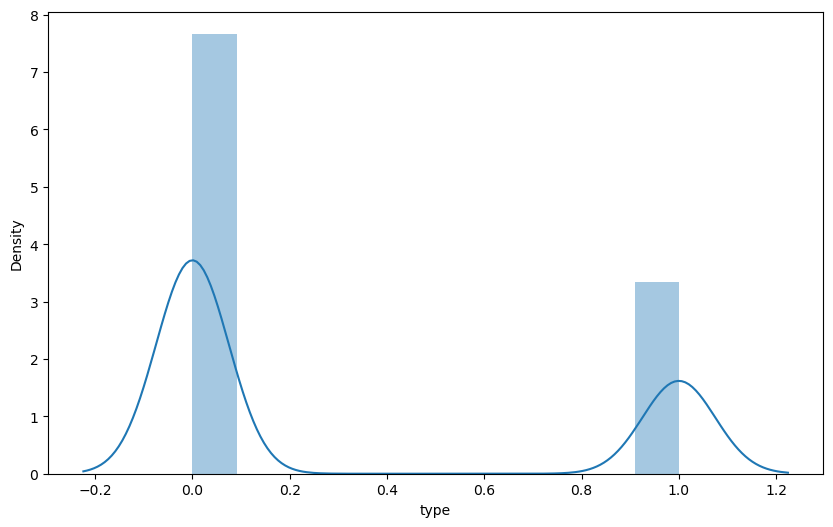

In [24]:
#plotting displot for depicting frequency of value of target variables
plt.figure(figsize=(10,6))
sns.distplot(net['type'])
plt.show()

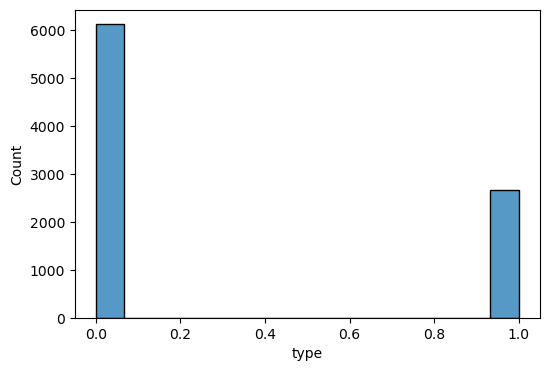

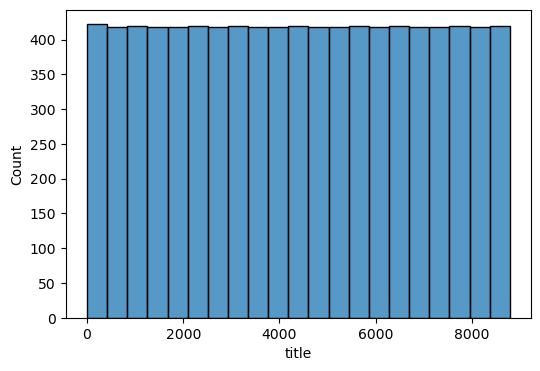

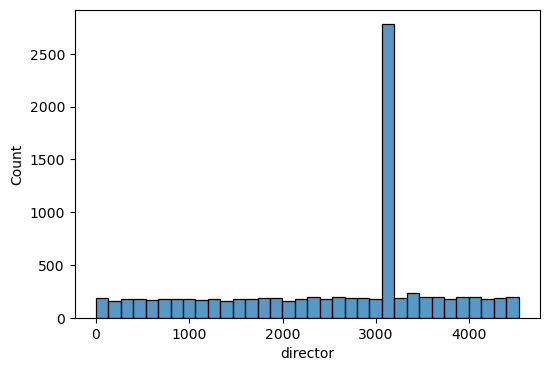

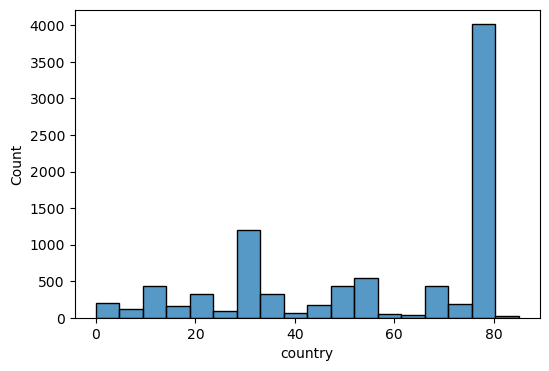

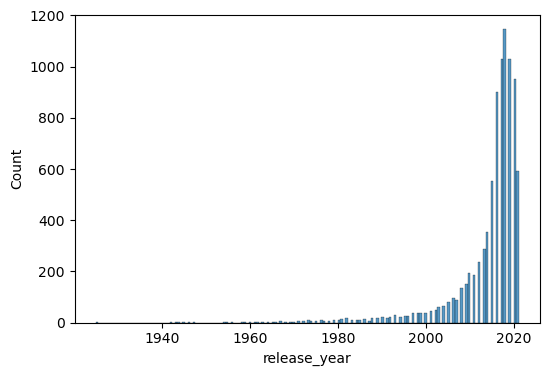

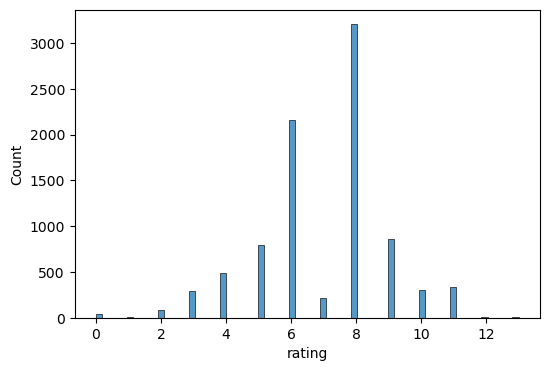

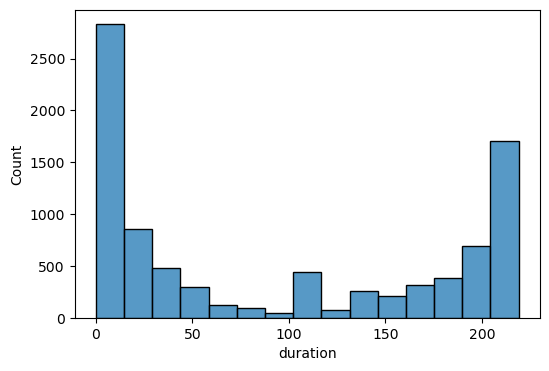

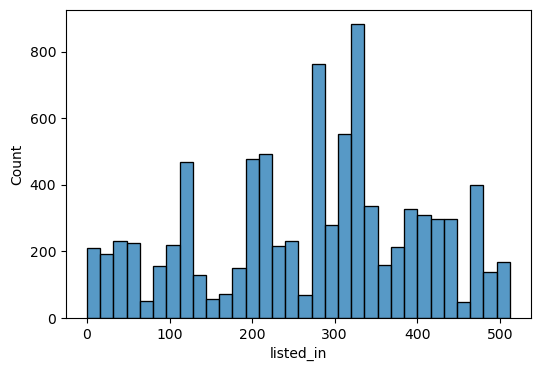

In [25]:
#plotting histogram for variables
for i in net.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(net[i])

# 4.Modeling, 5.prediction, 6.Model Evaluation

In [26]:
X = net.drop("type",axis=1)   # dropping target variable or taking all other variables except target variable
y = net["type"]               # taking target variable 
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)

In [27]:
# Decision tree 
from sklearn.tree import DecisionTreeClassifier
# Initialize the decision tree classifier
dt = DecisionTreeClassifier()
# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# Make predictions
y_pred_dt = dt.predict(X_test)

In [29]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.9914675767918089
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1196
           1       0.99      0.99      0.99       562

    accuracy                           0.99      1758
   macro avg       0.99      0.99      0.99      1758
weighted avg       0.99      0.99      0.99      1758



In [30]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
log= LogisticRegression()
# Train the model
log.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Make predictions
y_pred_log = log.predict(X_test)

In [32]:
# Evaluate the model
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy_log)
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

Accuracy: 0.810580204778157
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1196
           1       0.74      0.63      0.68       562

    accuracy                           0.81      1758
   macro avg       0.79      0.76      0.77      1758
weighted avg       0.81      0.81      0.81      1758



In [33]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [34]:
# Make predictions
y_pred_rf = rf.predict(X_test)

In [35]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9937428896473265
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1196
           1       0.99      0.99      0.99       562

    accuracy                           0.99      1758
   macro avg       0.99      0.99      0.99      1758
weighted avg       0.99      0.99      0.99      1758



In [36]:
# Support Vector Machine (SVM)
from sklearn import svm
# Create an SVM classifier with an RBF kernel
sv = svm.SVC(kernel='rbf', C=1, gamma='scale')
sv.fit(X_train, y_train)

SVC(C=1)

In [37]:
# Make predictions
y_pred_sv = sv.predict(X_test)

In [38]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_sv)
print("Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_sv))

Accuracy: 0.8373151308304891
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1196
           1       0.76      0.71      0.74       562

    accuracy                           0.84      1758
   macro avg       0.82      0.80      0.81      1758
weighted avg       0.83      0.84      0.84      1758



In [39]:
# K Nearest Neighbour(KNN)
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [40]:
# Make predictions
y_pred_knn = knn.predict(X_test)

In [41]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.9237770193401593
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1196
           1       0.88      0.88      0.88       562

    accuracy                           0.92      1758
   macro avg       0.91      0.91      0.91      1758
weighted avg       0.92      0.92      0.92      1758



In [42]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create a Linear Regression model
Linear= LinearRegression()
# Train the model using the training data
Linear.fit(X_train, y_train)

LinearRegression()

In [43]:
# Make predictions
y_pred_Linear = Linear.predict(X_test)

In [44]:
# Evaluate the model
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_Linear)
print(f"Mean Squared Error: {mse}")

# Calculate R² Score
r2 = r2_score(y_test, y_pred_Linear)
print(f"R² Score: {r2}")

# Get the coefficients 
coefficients = Linear.coef_
print(f"Coefficients: {coefficients}")

# Get the  intercept
intercept = Linear.intercept_
print(f"Intercept: {intercept}")

Mean Squared Error: 0.14329834623824914
R² Score: 0.34111226308414166
Coefficients: [ 2.94185010e-06  7.29062581e-05  1.67172417e-03  4.44472895e-03
  4.90303363e-02 -1.82692438e-03  7.33618035e-04]
Intercept: -9.315258294164863


In [45]:
# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
# Train the Naive Bayes classifier
naive = MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB()

In [46]:
# Make Predictions
y_pred_naive = naive.predict(X_test)

In [47]:
# Evaluate the model
accuracy_naive = accuracy_score(y_test, y_pred_naive)
print("Accuracy:", accuracy_naive)
print("Classification Report:")
print(classification_report(y_test, y_pred_naive))

Accuracy: 0.6621160409556314
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.64      0.72      1196
           1       0.48      0.70      0.57       562

    accuracy                           0.66      1758
   macro avg       0.65      0.67      0.65      1758
weighted avg       0.71      0.66      0.67      1758



In [48]:
# K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [49]:
from sklearn.metrics import silhouette_score
# Make Predictios
y_pred_kmeans = kmeans.predict(X_test)
silhouette_kmeans = silhouette_score(X_train, kmeans.labels_)

In [50]:
# Evaluate the model
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
print("Accuracy:", accuracy_kmeans)
print("Classification Report:")
print(classification_report(y_test, y_pred_kmeans))

Accuracy: 0.4778156996587031
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.47      0.56      1196
           1       0.44      0.49      0.46       562
           2       0.00      0.00      0.00         0

    accuracy                           0.48      1758
   macro avg       0.37      0.32      0.34      1758
weighted avg       0.60      0.48      0.53      1758



In [51]:
#Principle Component Analysis (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Initialize and fit PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
log.fit(X_train_pca, y_train)

LogisticRegression()

In [53]:
# Make predictions on the test set
y_pred_pca = log.predict(X_test_pca)

In [54]:
# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy:", accuracy_pca)
print("Classification Report:")
print(classification_report(y_test, y_pred_pca))

Accuracy: 0.7565415244596132
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1196
           1       0.67      0.47      0.55       562

    accuracy                           0.76      1758
   macro avg       0.73      0.68      0.69      1758
weighted avg       0.75      0.76      0.74      1758



In [55]:
# final evaluation of all model
from sklearn.model_selection import cross_val_score, cross_validate

def evaluate_model_with_cv(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")
    print("-" * 30)

# Initialize models
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(random_state=46),
    svm.SVC(kernel='rbf'),
    KNeighborsClassifier(n_neighbors=10),
    LogisticRegression(),
    LinearRegression(),
    MultinomialNB(),
    KMeans(n_clusters=3, random_state=42),
    PCA(n_components=2)
]

# Evaluate each model with cross-validation
for model in models:
    evaluate_model_with_cv(model, X, y, cv=5)

Model: DecisionTreeClassifier
Mean Accuracy: 0.9787
Standard Deviation: 0.0124
------------------------------
Model: RandomForestClassifier
Mean Accuracy: 0.9842
Standard Deviation: 0.0162
------------------------------
Model: SVC
Mean Accuracy: 0.8271
Standard Deviation: 0.0173
------------------------------
Model: KNeighborsClassifier
Mean Accuracy: 0.9058
Standard Deviation: 0.0443
------------------------------
Model: LogisticRegression
Mean Accuracy: 0.8024
Standard Deviation: 0.0220
------------------------------
Model: LinearRegression
Mean Accuracy: nan
Standard Deviation: nan
------------------------------
Model: MultinomialNB
Mean Accuracy: 0.6082
Standard Deviation: 0.0751
------------------------------
Model: KMeans
Mean Accuracy: 0.3075
Standard Deviation: 0.0266
------------------------------
Model: PCA
Mean Accuracy: nan
Standard Deviation: nan
------------------------------
